In [2]:
%matplotlib inline
data_5min_path = "../station_5min/2015/d11/"
import pandas as pd
import numpy as np
import gzip

In [3]:
import datetime as dt


In [4]:
dt.date(2016,1,1)

datetime.date(2016, 1, 1)

In [5]:
dt.date?

In [6]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(data_5min_path) if isfile(join(data_5min_path, f))]

In [7]:
onlyfiles[0]

'd11_text_station_5min_2015_01_01.txt.gz'

In [8]:
colnames = ['Timestamp', 'Station', 'District', 'Freeway #', 'Direction', 'Lane Type', 'Station Length', 'Samples', 
            '% Observed', 'TotalFlow', 'AvgOccupancy', 'AvgSpeed', 'Lane 1 Samples', 'Lane 1 Flow', 'Lane 1 Avg Occ', 'Lane 1 Avg Speed', 'Lane 1 Observed', 'Lane 2 Samples', 'Lane 2 Flow', 'Lane 2 Avg Occ', 'Lane 2 Avg Speed', 'Lane 2 Observed', 'Lane 3 Samples', 'Lane 3 Flow', 'Lane 3 Avg Occ', 'Lane 3 Avg Speed', 'Lane 3 Observed', 'Lane 4 Samples', 'Lane 4 Flow', 'Lane 4 Avg Occ', 'Lane 4 Avg Speed', 'Lane 4 Observed', 'Lane 5 Samples', 'Lane 5 Flow', 'Lane 5 Avg Occ', 'Lane 5 Avg Speed', 'Lane 5 Observed', 'Lane 6 Samples', 'Lane 6 Flow', 'Lane 6 Avg Occ', 'Lane 6 Avg Speed', 'Lane 6 Observed', 'Lane 7 Samples', 'Lane 7 Flow', 'Lane 7 Avg Occ', 'Lane 7 Avg Speed', 'Lane 7 Observed', 'Lane 8 Samples', 'Lane 8 Flow', 'Lane 8 Avg Occ', 'Lane 8 Avg Speed', 'Lane 8 Observed']

In [9]:
with gzip.open(data_5min_path+onlyfiles[0], 'rb') as f:
    file_content = pd.read_csv(f,header=None,names=colnames)

In [10]:
file_content[:5]

,Timestamp,Station,District,Freeway #,Direction,Lane Type,Station Length,Samples,% Observed,TotalFlow,...,Lane 7 Samples,Lane 7 Flow,Lane 7 Avg Occ,Lane 7 Avg Speed,Lane 7 Observed,Lane 8 Samples,Lane 8 Flow,Lane 8 Avg Occ,Lane 8 Avg Speed,Lane 8 Observed
0,01/01/2015 00:00:00,1100313,11,5,N,FR,NaN,10,100,16.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
1,01/01/2015 00:00:00,1100323,11,5,N,FR,NaN,20,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
2,01/01/2015 00:00:00,1100326,11,5,N,FR,NaN,20,100,11.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
3,01/01/2015 00:00:00,1100330,11,5,N,FR,NaN,20,100,7.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
4,01/01/2015 00:00:00,1100333,11,5,N,FR,NaN,10,100,3.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [11]:
file_content.shape

(425952, 52)

In [12]:
meta_path = "../station_5min/2015/meta_data/d11/"

In [13]:
#onlyfiles = [f for f in listdir(meta_path) if isfile(join(meta_path, f))]

In [14]:
%pwd

u'/Users/cjstev/Documents/DSE_Cohort2_Traffic_Capstone/C2 Exploratory'

In [15]:
file_content.ix[file_content.Station == 1100313,['Timestamp','TotalFlow','AvgOccupancy','AvgSpeed','Lane Type']]

,Timestamp,TotalFlow,AvgOccupancy,AvgSpeed,Lane Type
0,01/01/2015 00:00:00,16.0,NaN,NaN,FR
1479,01/01/2015 00:05:00,8.0,NaN,NaN,FR
2958,01/01/2015 00:10:00,0.0,NaN,NaN,FR
4437,01/01/2015 00:15:00,NaN,NaN,NaN,FR
5916,01/01/2015 00:20:00,6.0,NaN,NaN,FR
7395,01/01/2015 00:25:00,26.0,NaN,NaN,FR
8874,01/01/2015 00:30:00,18.0,NaN,NaN,FR
10353,01/01/2015 00:35:00,22.0,NaN,NaN,FR
11832,01/01/2015 00:40:00,23.0,NaN,NaN,FR
13311,01/01/2015 00:45:00,20.0,NaN,NaN,FR


### Find some healthy sensors

In [16]:
def count_bad_sensors(df):
    count_nan_df = df
    count_nan_df['Station'] = count_nan_df['Station'].astype(str)
    count_nan_df = count_nan_df[['Station','Timestamp','TotalFlow','AvgOccupancy','AvgSpeed']]
    num = count_nan_df._get_numeric_data()
    num[num > 0] = 0
    count_nan_df=count_nan_df.replace(np.nan,1)
    count_nan_df=count_nan_df.groupby('Station').sum().reset_index()
    count_nan_df['Total'] = count_nan_df['TotalFlow']+count_nan_df['AvgOccupancy']+count_nan_df['AvgSpeed']
    count_nan_df=count_nan_df.sort_values('Total')
    return count_nan_df

In [17]:
def calc_avg_obs(df):
    count_nan_df = df
    count_nan_df['Station'] = count_nan_df['Station'].astype(str)
    count_nan_df = count_nan_df[['Station','% Observed']]
    count_nan_df=count_nan_df.groupby('Station').mean().reset_index()
    return count_nan_df

In [18]:
df_missing = count_bad_sensors(file_content)

In [19]:
df_obs = calc_avg_obs(file_content)

In [20]:
df_missing = df_missing.ix[df_missing.Total == 0,'Station']

In [21]:
df_obs = df_obs.ix[df_obs['% Observed'] == 100,'Station']

In [22]:
df_obs

Series([], Name: Station, dtype: object)

### Plot some of the good ones

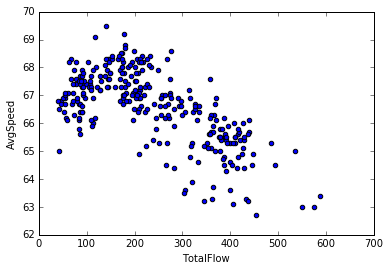

In [23]:
small_df = file_content.ix[file_content.Station == '1114050',['Timestamp','TotalFlow','AvgOccupancy','AvgSpeed']]
small_df.plot('TotalFlow','AvgSpeed','scatter')

### Do a big one

In [24]:
import time

In [25]:
df_list = []
for i, filename in enumerate(onlyfiles):
    t1 = time.time()
    with gzip.open(data_5min_path+filename, 'rb') as f:
        file_content = pd.read_csv(f,header=None,names=colnames)
        df_list.append(file_content)
    t2 = time.time()
    print i, t2-t1
    if i == 30:
        break

0 2.20072388649
1 2.27030801773
2 2.25353813171
3 2.49264597893
4 2.58403301239
5 2.3843460083
6 2.56677985191
7 2.49516391754
8 2.45074605942
9 2.35373187065
10 2.29573583603
11 2.32743906975
12 2.38678598404
13 2.43270802498
14 2.31245708466
15 2.27628183365
16 2.39964389801
17 2.3530049324
18 2.33237886429
19 2.33995890617
20 2.32965803146
21 2.39665913582
22 2.38468694687
23 2.29583597183
24 2.32606577873
25 2.65743589401
26 2.7264149189
27 2.7431910038
28 2.65354204178
29 2.64608597755
30 2.30231595039


In [26]:
big_df = pd.concat(df_list)

In [27]:
big_df.shape

(13204512, 52)

In [28]:
sensor_results = count_bad_sensors(big_df).reset_index(drop=True)

In [29]:
small_df['Power'] = small_df['TotalFlow'] * small_df['AvgSpeed'] 
small_df['Efficiency'] = small_df['AvgSpeed'] /  small_df['TotalFlow'] 

In [30]:
small_df['Timestamp'] = pd.to_datetime(small_df['Timestamp'])


In [31]:
small_df['Time'] = small_df['Timestamp'].apply(lambda x:x.time())
small_df['Date'] = small_df['Timestamp'].apply(lambda x:x.date())

In [32]:
time_df = pd.DataFrame()

In [33]:
time_df['Time'] = small_df['Time'].unique()

In [34]:
time_df = time_df.sort_values('Time').reset_index(drop=True).reset_index()

In [35]:
small_df = small_df.merge(time_df)

In [36]:
small_df.plot?

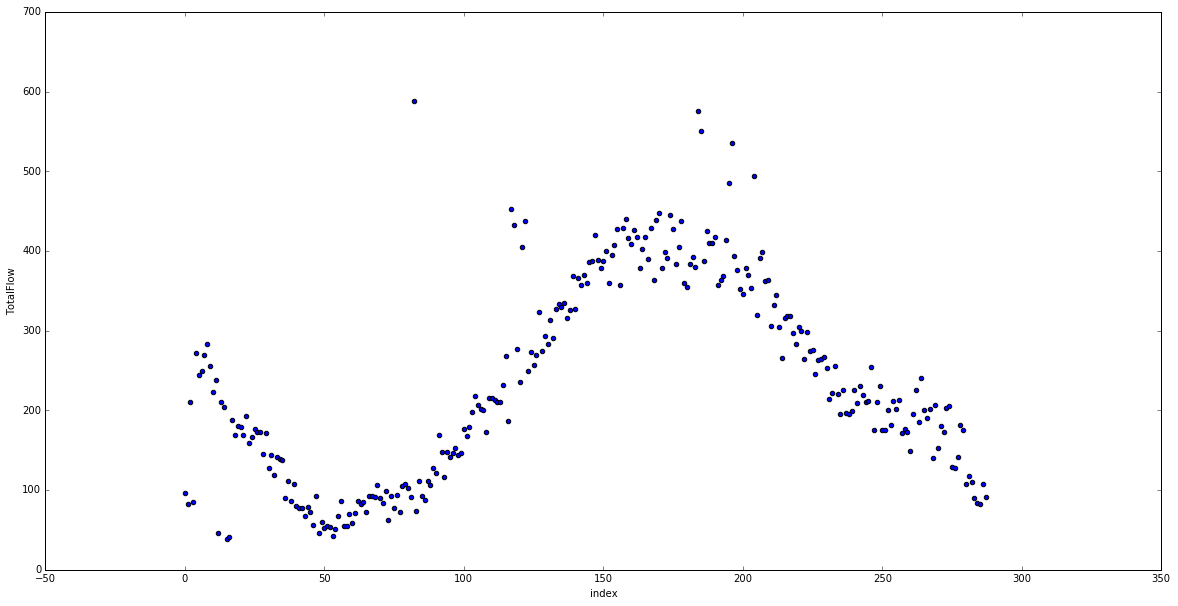

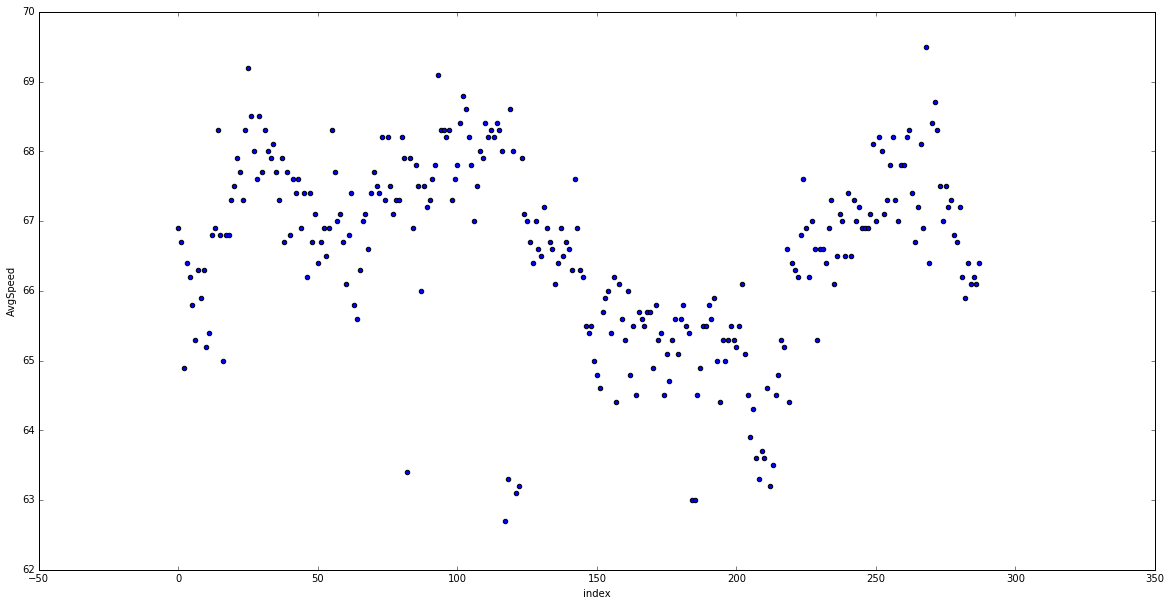

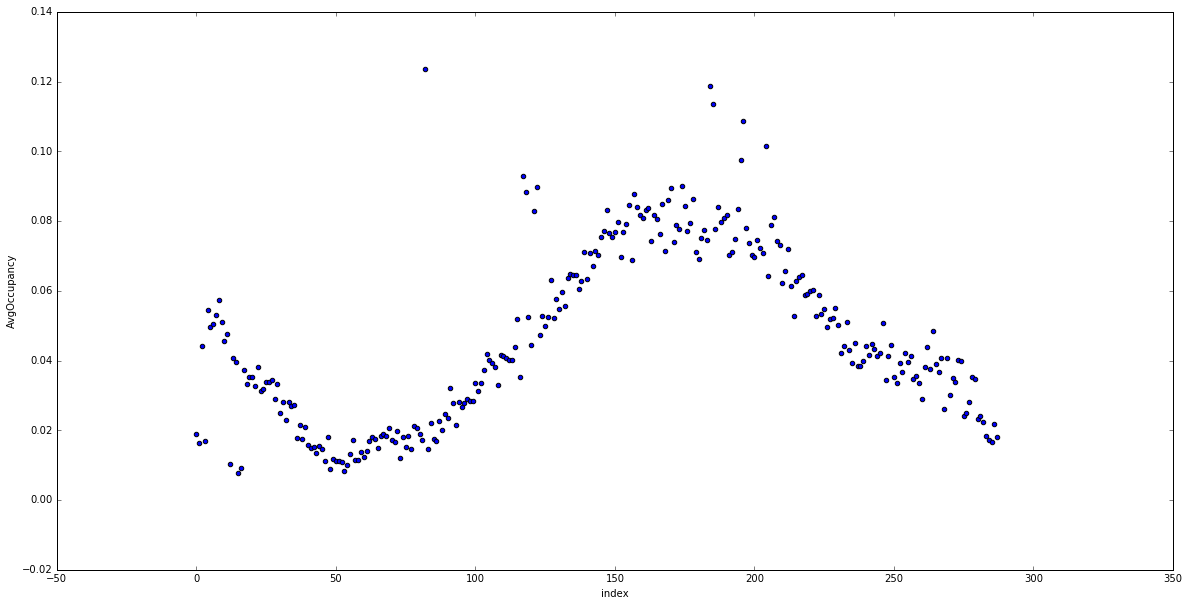

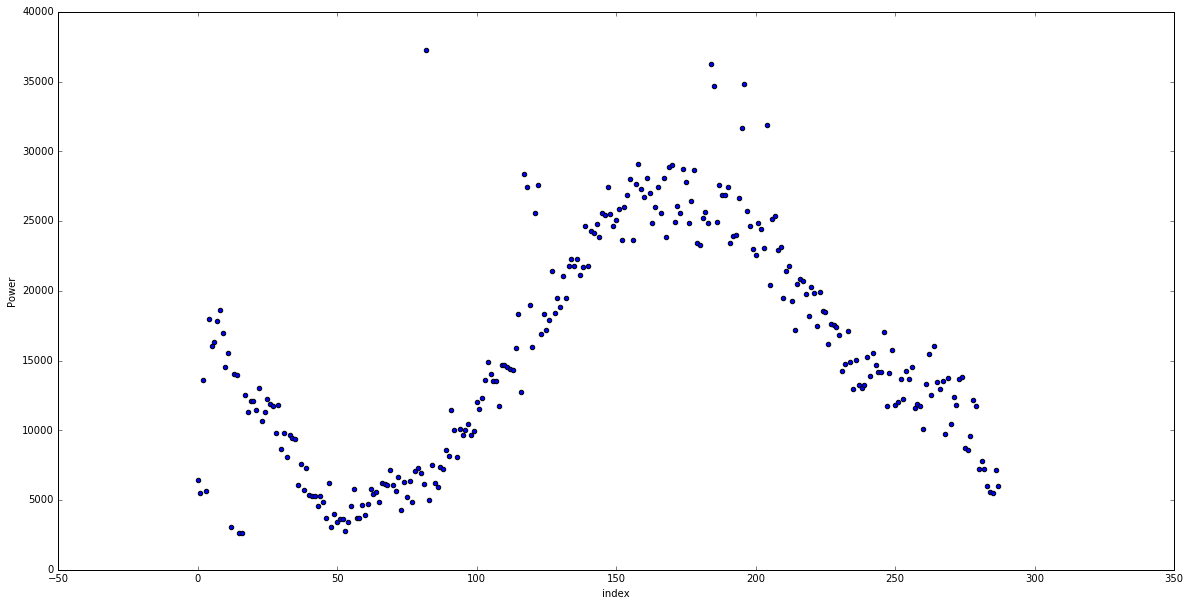

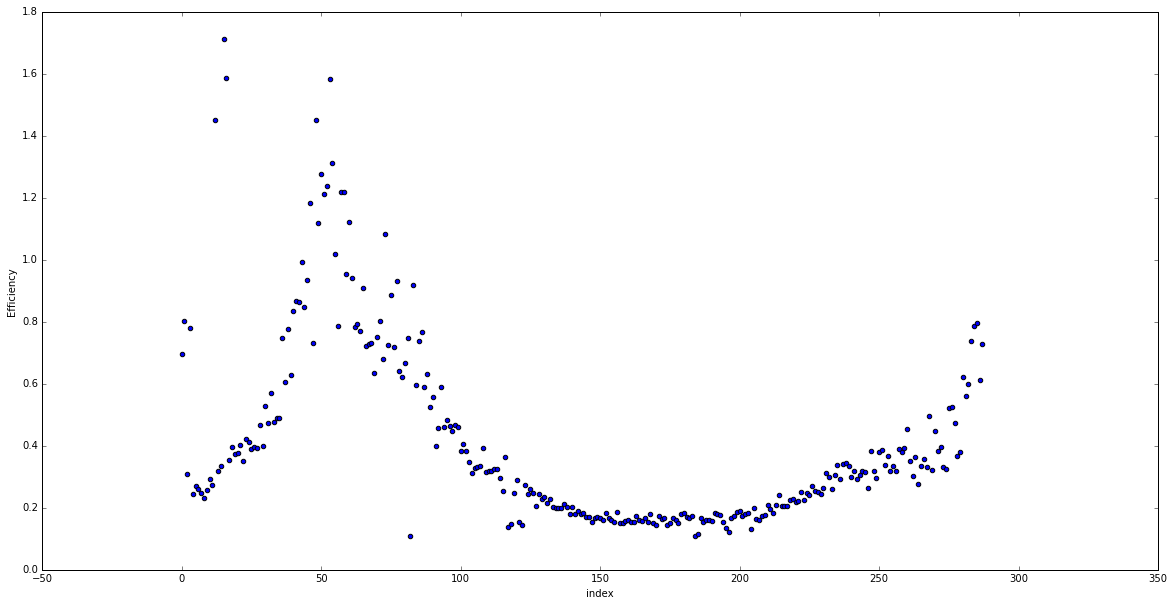

In [37]:
small_df.plot('index','TotalFlow','scatter', figsize=(20,10))
small_df.plot('index','AvgSpeed','scatter', figsize=(20,10))
small_df.plot('index','AvgOccupancy','scatter', figsize=(20,10))
small_df.plot('index','Power','scatter', figsize=(20,10))
small_df.plot('index','Efficiency','scatter', figsize=(20,10))

In [38]:
pivoted = small_df.pivot(index='Date', columns='Time', values='Power').reset_index()

In [39]:
pivoted

Time,Date,00:00:00,00:05:00,00:10:00,00:15:00,00:20:00,00:25:00,00:30:00,00:35:00,00:40:00,...,23:10:00,23:15:00,23:20:00,23:25:00,23:30:00,23:35:00,23:40:00,23:45:00,23:50:00,23:55:00
0,2015-01-01,6422.4,5536.1,13629.0,5644.0,18006.4,16055.2,16325.0,17834.7,18649.7,...,12157.6,11739.2,7257.6,7811.6,7249.0,5976.0,5552.4,5494.6,7138.8,6042.4


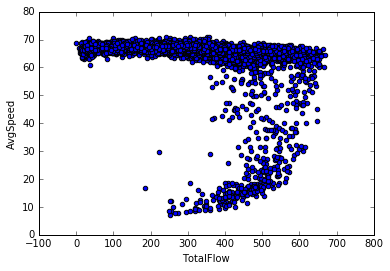

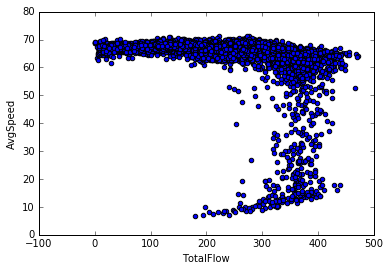

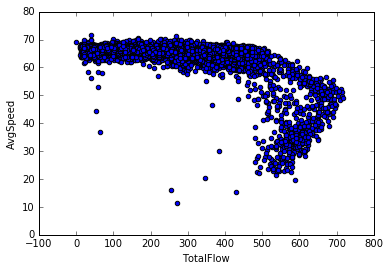

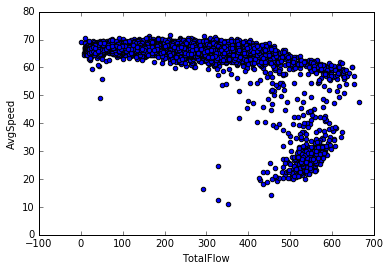

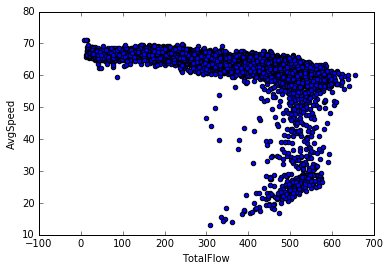

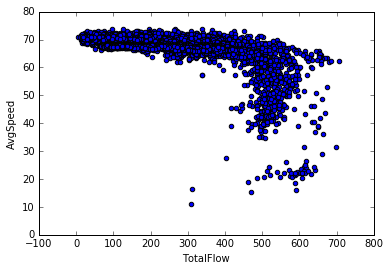

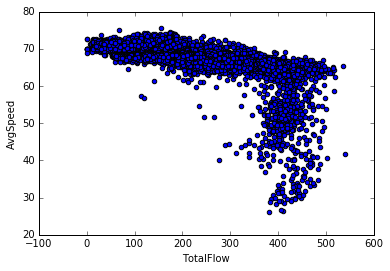

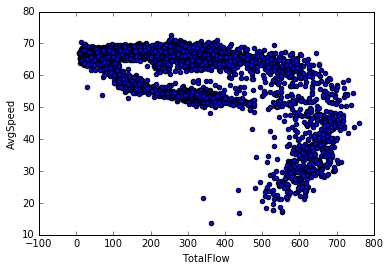

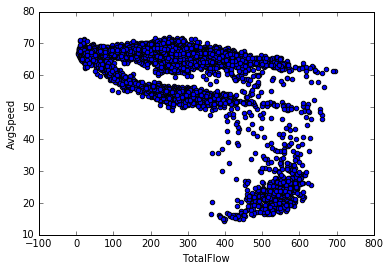

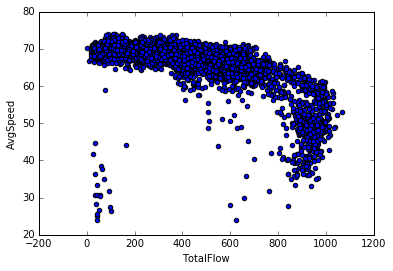

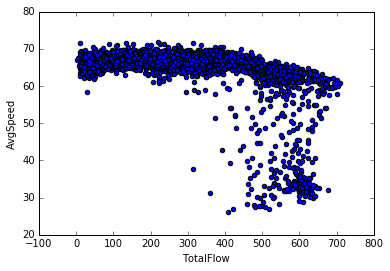

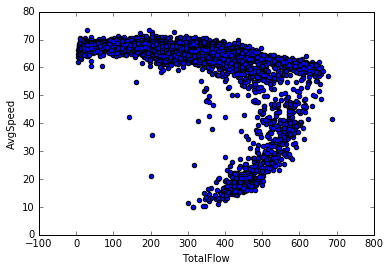

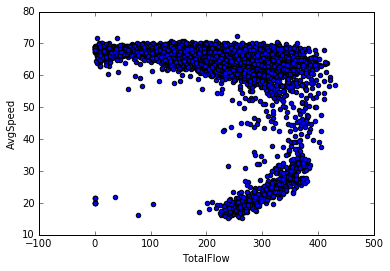

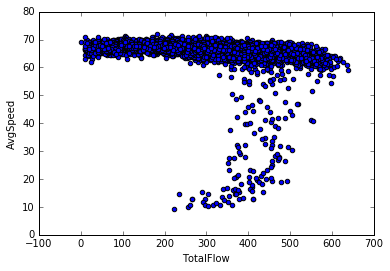

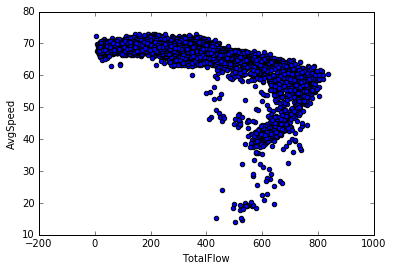

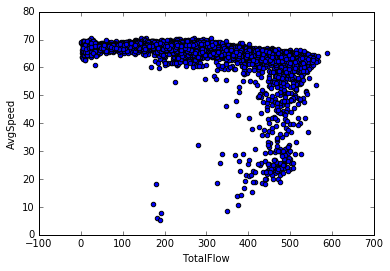

In [40]:
my_list = list(sensor_results.ix[:15,'Station'])
for station in my_list:
    small_df = big_df.ix[big_df.Station == station,['Timestamp','TotalFlow','AvgOccupancy','AvgSpeed']]
    small_df.plot('TotalFlow','AvgSpeed','scatter')

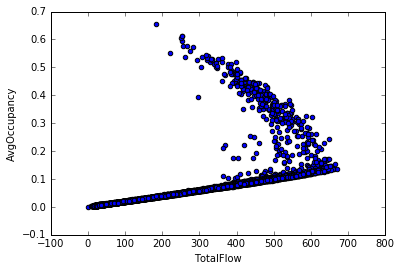

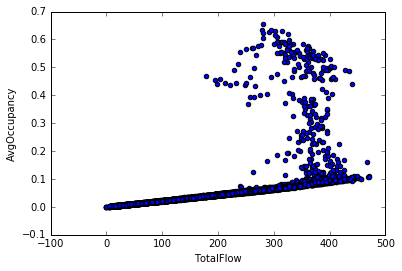

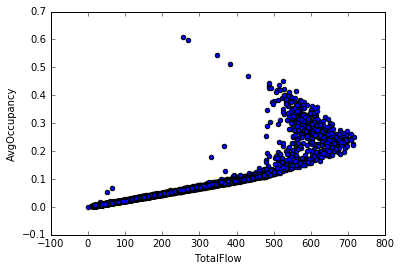

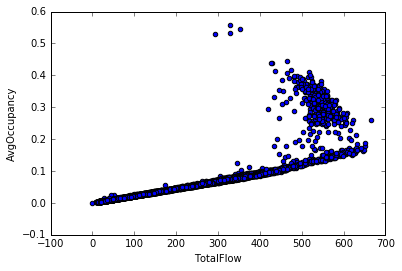

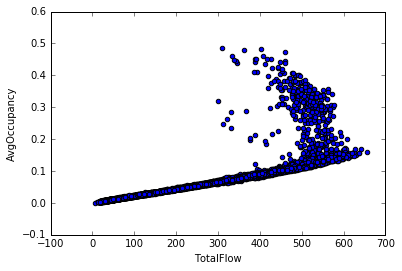

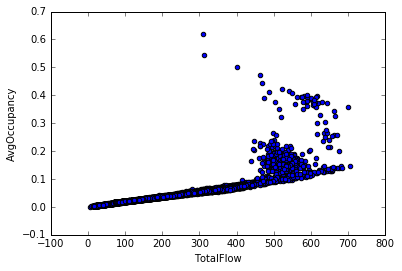

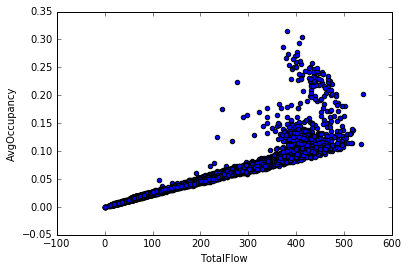

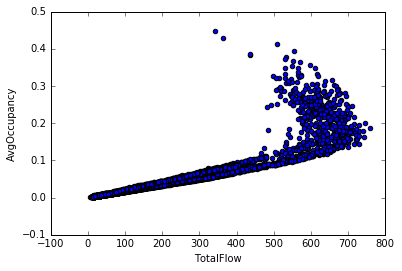

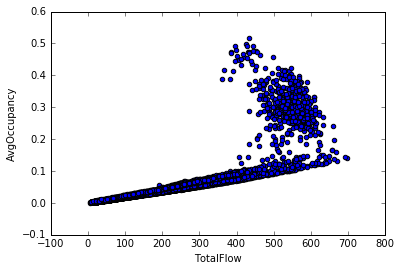

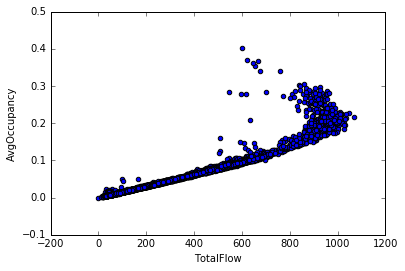

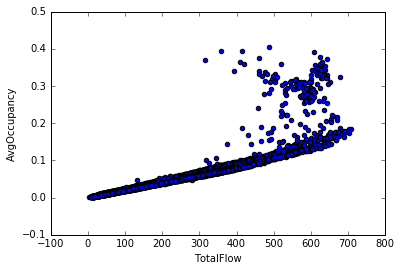

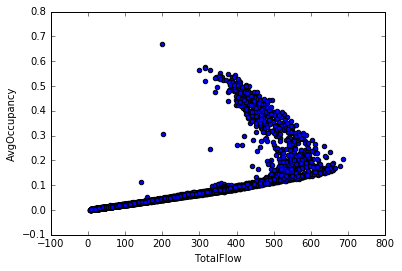

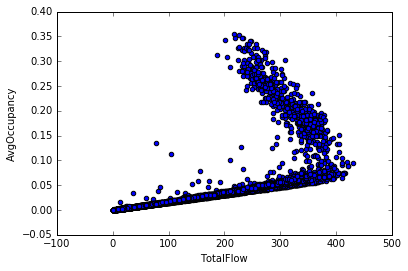

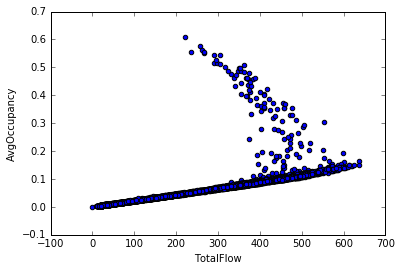

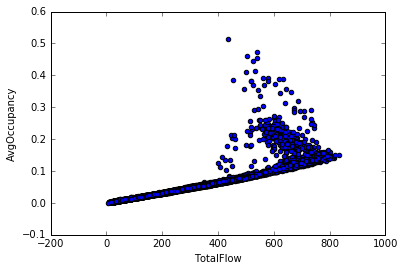

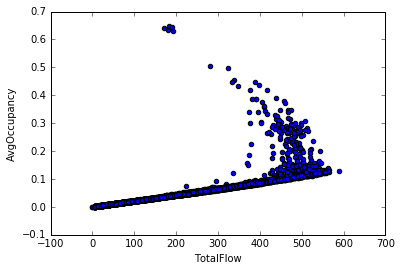

In [41]:
my_list = list(sensor_results.ix[:15,'Station'])
for station in my_list:
    small_df = big_df.ix[big_df.Station == station,['Timestamp','TotalFlow','AvgOccupancy','AvgSpeed']]
    small_df.plot('TotalFlow','AvgOccupancy','scatter')

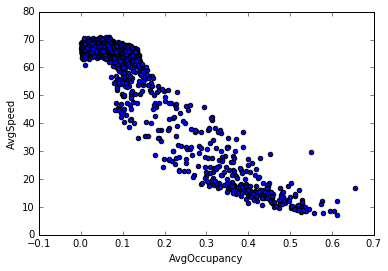

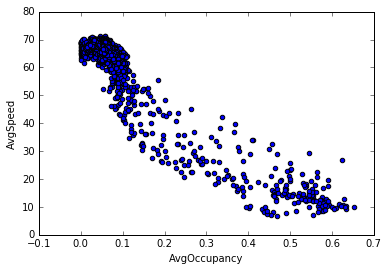

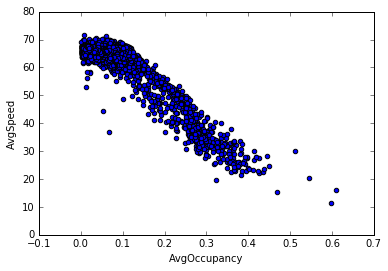

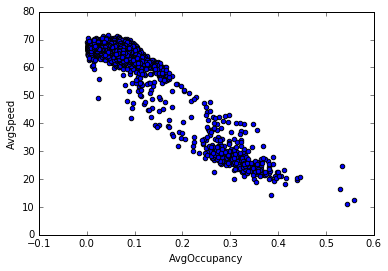

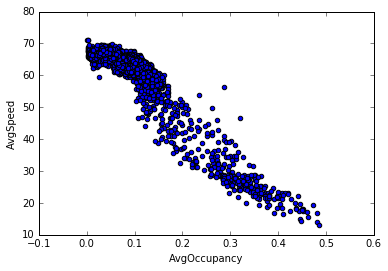

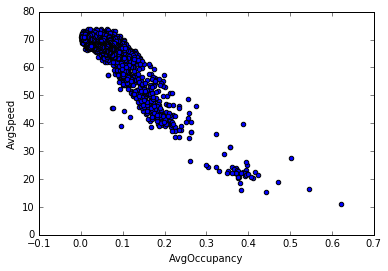

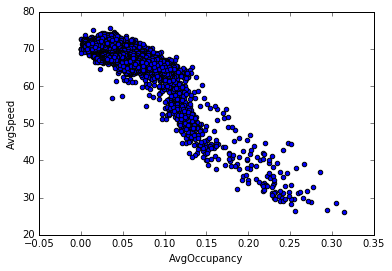

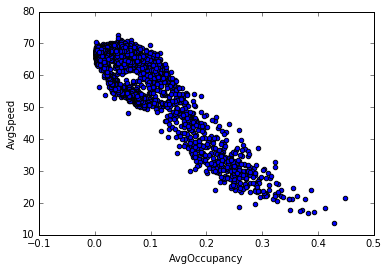

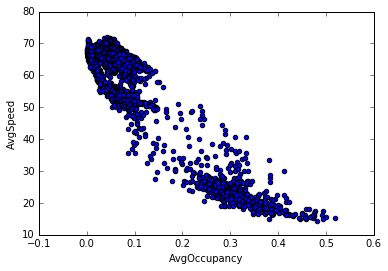

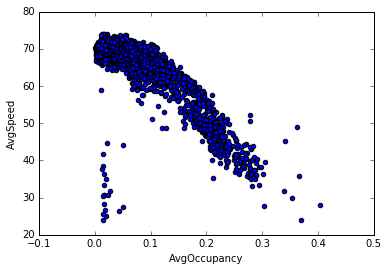

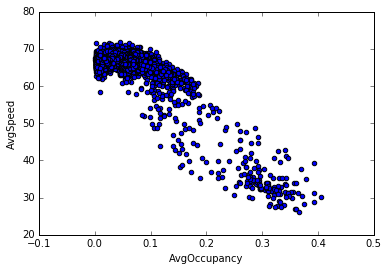

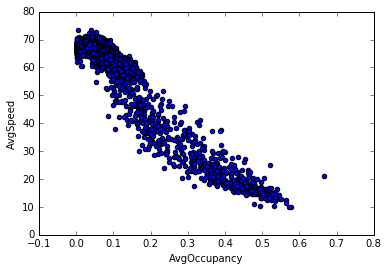

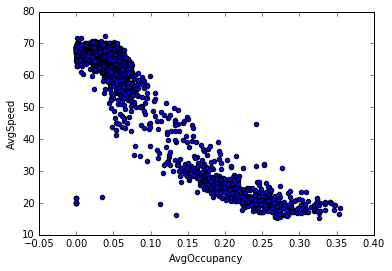

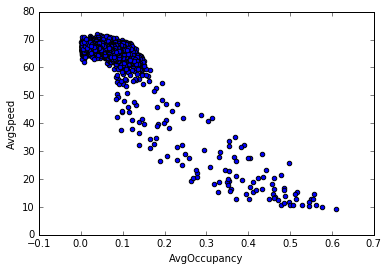

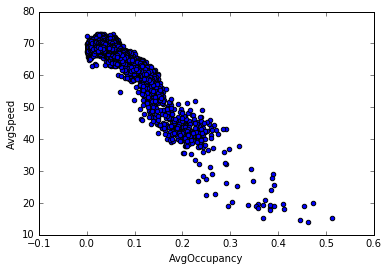

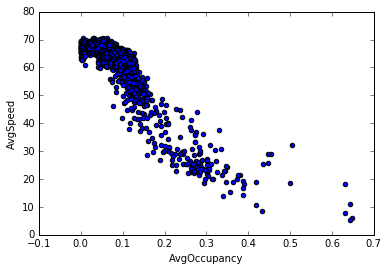

In [42]:
my_list = list(sensor_results.ix[:15,'Station'])
for station in my_list:
    small_df = big_df.ix[big_df.Station == station,['Timestamp','TotalFlow','AvgOccupancy','AvgSpeed']]
    small_df.plot('AvgOccupancy','AvgSpeed','scatter')

In [44]:
import matplotlib.pyplot as plt

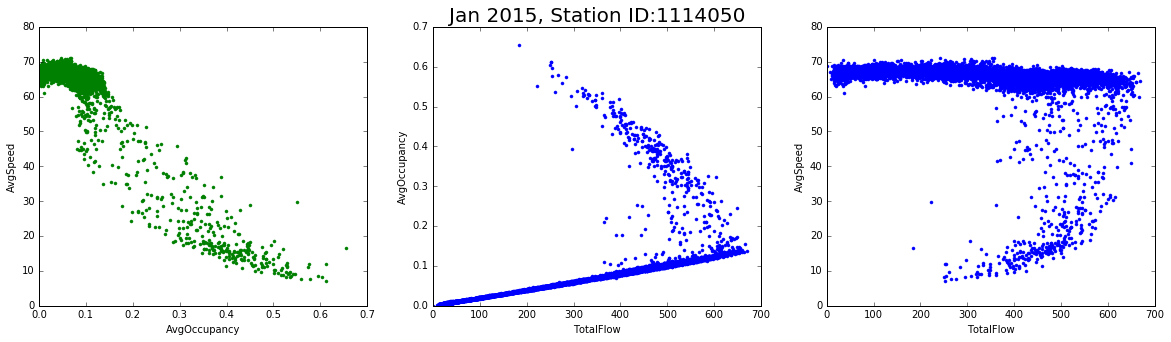

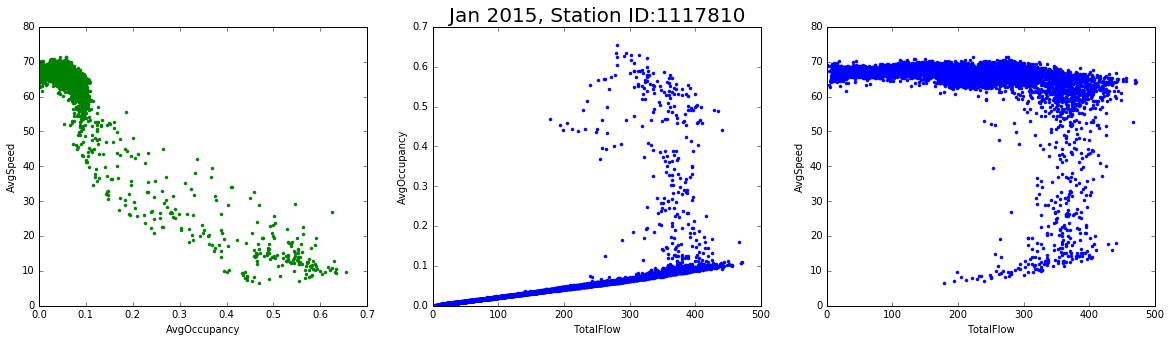

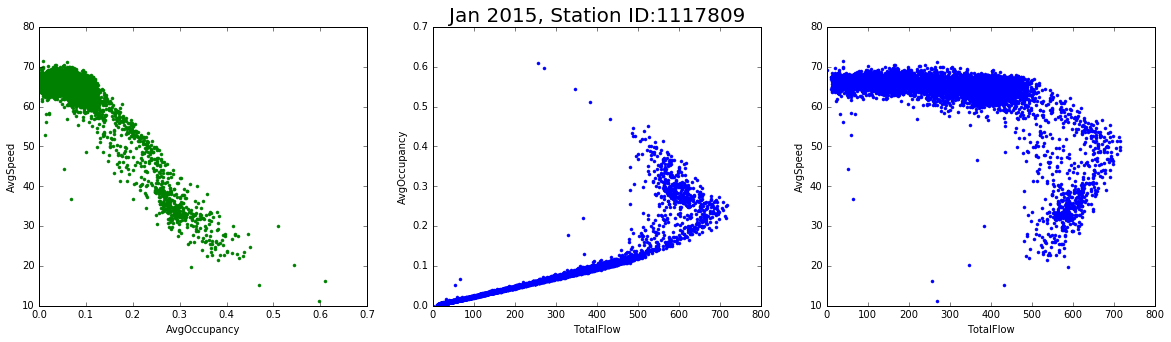

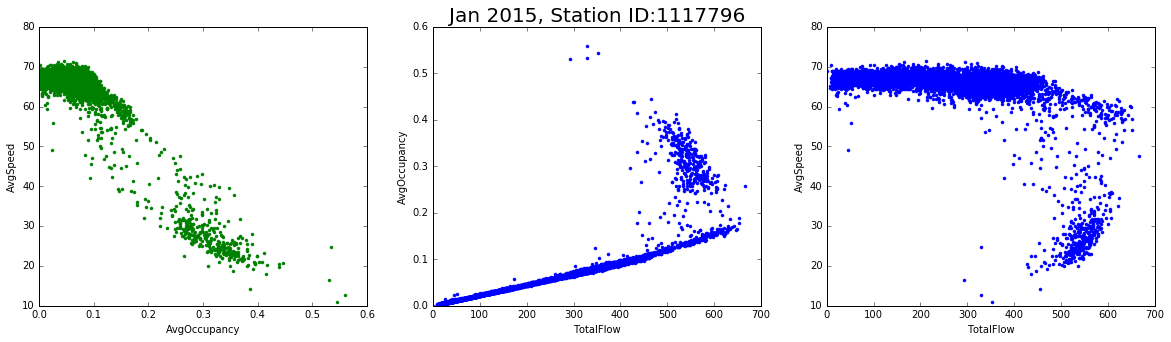

In [69]:
my_list = list(sensor_results.ix[:3,'Station'])
for station in my_list:
    small_df = big_df.ix[big_df.Station == station,['Timestamp','TotalFlow','AvgOccupancy','AvgSpeed']]

    fig = plt.figure(figsize = (20,5))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    plt.title('Jan 2015, Station ID:{}'.format(station),{'fontsize': 20})
    ax3 = fig.add_subplot(1, 3, 3)
    #ax3 = fig.add_subplot(2, 2, 4)
    ax1.plot(small_df.AvgOccupancy,small_df.AvgSpeed,'g.')
    ax2.plot(small_df.TotalFlow,small_df.AvgOccupancy,'b.')


    ax3.plot(small_df.TotalFlow,small_df.AvgSpeed,'b.')
    ax1.set_xlabel('AvgOccupancy')
    ax1.set_ylabel('AvgSpeed')
    ax2.set_xlabel('TotalFlow')
    ax2.set_ylabel('AvgOccupancy')
    ax3.set_xlabel('TotalFlow')
    ax3.set_ylabel('AvgSpeed')
    plt.show()
    #small_df.plot('Occ','Efficiency','scatter')